# DATA SCIENCE CHALLENGE (GROUP 1)
**Performed By: Tirth Patel, Vishal Kapadia                  
(MS in Applied Data Science, USC)**


# **DATA CLEANING**
**Q1-A**

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading CSV File
stock1000=pd.read_csv("stock_1000.csv")

In [3]:
#Description of Datafile
stock1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Columns: 6001 entries, Unnamed: 0 to Volume.999
dtypes: object(6001)
memory usage: 244.1+ MB


In [4]:
#Columns 
stock1000.columns

Index(['Unnamed: 0', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Adj Close.3',
       'Adj Close.4', 'Adj Close.5', 'Adj Close.6', 'Adj Close.7',
       'Adj Close.8',
       ...
       'Volume.990', 'Volume.991', 'Volume.992', 'Volume.993', 'Volume.994',
       'Volume.995', 'Volume.996', 'Volume.997', 'Volume.998', 'Volume.999'],
      dtype='object', length=6001)

In [5]:
#Renaming the Columns Name
stock1000 = stock1000.rename(columns={"Adj Close":"Adj Close.0","Open":"Open.0","High":"High.0","Low":"Low.0","Close":"Close.0","Volume":"Volume.0" })

In [6]:
#Quick Look at Data
stock1000

,Unnamed: 0,Adj Close.0,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Volume.990,Volume.991,Volume.992,Volume.993,Volume.994,Volume.995,Volume.996,Volume.997,Volume.998,Volume.999
0,NaN,A,AA,AAAP,AAC,AAL,AAMC,AAME,AAN,AAOI,...,WRLD,WRN,WTR,XKE,XLRN,Y,ZERO,ZLTQ,ZNH,ZX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03 00:00:00,44.53033447265625,71.91571044921875,NaN,NaN,NaN,NaN,2.13700795173645,NaN,NaN,...,11600.0,NaN,NaN,NaN,NaN,4439.0,NaN,NaN,25350.0,NaN
3,2000-01-04 00:00:00,41.12873077392578,72.45111083984375,NaN,NaN,NaN,NaN,2.1947648525238037,NaN,NaN,...,8000.0,NaN,NaN,NaN,NaN,634.0,NaN,NaN,16050.0,NaN
4,2000-01-05 00:00:00,38.57750701904297,76.73390197753906,NaN,NaN,NaN,NaN,2.252521514892578,NaN,NaN,...,21400.0,NaN,NaN,NaN,NaN,2156.0,NaN,NaN,25350.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,2021-02-23 00:00:00,122.42,24.9,NaN,NaN,20.66,23.48,4.41,20.852,11.4,...,27600,1.7935e+06,NaN,NaN,376200,66900,NaN,NaN,179500,NaN
5328,2021-02-24 00:00:00,125.02,27.2,NaN,NaN,21.82,23.67,4.53,22.0475,11.61,...,49100,1.2146e+06,NaN,NaN,205400,130400,NaN,NaN,80100,NaN
5329,2021-02-25 00:00:00,122.1,25.56,NaN,NaN,20.86,23.93,4.63,22.0874,11.17,...,28300,1.4628e+06,NaN,NaN,258500,70300,NaN,NaN,74400,NaN
5330,2021-02-26 00:00:00,122.07,24.55,NaN,NaN,20.94,22.8,4.47,21.8781,9.325,...,36700,859400,NaN,NaN,606600,97700,NaN,NaN,29400,NaN


In [7]:
#Creating the copy of data
data=stock1000.copy()
data=data[2:]

In [8]:
#Renaming the column name to Date
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [9]:
#Reset Index
data.index = range(data.shape[0])

Taking the Last 5 Years Data from 2015 to 2021. As, the stock market data is unstructured datewise, by checking it manually, Every year contains about 252 days of Stock Market Data excluding the Data from Holidays. Thus, By using Python Slicing function we took last 5 years data.

In [10]:
#Slicing the last 5 years data
data = data[3777:]

In [11]:
#Reset Index
data.index = range(data.shape[0])

# Handling Null Values
Dropping the Null Valued Columns as there are no more data for the same in whole columns.

In [12]:
#Dropping the last row of null values
data= data[:-1]

In [13]:
#Fetching the Columns where there are null values
drop_col = []
for i in data.columns:
    count = data[i].isnull().sum()
    if count == 1552:
        drop_col.append(i)

In [14]:
#Dropping the columns with Null Values
data = data.drop(columns = drop_col)

In [15]:
#Filling the Null Values With Forward and Backward Fill
data.fillna(method='ffill', inplace=True)

In [16]:
#Filling the Null Values With Forward and Backward Fill
data.fillna(method='bfill', inplace=True)

In [17]:
#Checking if any null values
data.isnull().sum()

Date           0
Adj Close.0    0
Adj Close.1    0
Adj Close.2    0
Adj Close.4    0
              ..
Volume.990     0
Volume.991     0
Volume.994     0
Volume.995     0
Volume.998     0
Length: 4207, dtype: int64

In [18]:
#Renaming the Columns name and fetching the data Company wise
Company= stock1000.loc[0].unique()
Company[0]="Date"

In [19]:
#Creating a new Dataframe Company wise
final_data = pd.DataFrame(columns=Company)
final_data['Date']=data['Date']
final_data.index = range(data.shape[0])

In [20]:
for i in range(1000):
    if 'Open.{0}'.format(i) not in drop_col:
        list1 = []
        for j in range(len(data)):
            dictionary = {}
            dictionary = {'Open':data['Open.{0}'.format(i)][j], 'Close':data['Close.{0}'.format(i)][j], 'Adj Close':data['Adj Close.{0}'.format(i)][j]
                      ,'High':data['High.{0}'.format(i)][j],'Low':data['Low.{0}'.format(i)][j],'Volume':data['Volume.{0}'.format(i)][j]}
            list1.append(dictionary)
        for k in range(len(final_data)):
            name = stock1000['Open.{0}'.format(i)][0]
            final_data[name][k] = list1[k]

In [21]:
final_data['A'][479]

{'Open': 44.18000030517578,
 'Close': 44.650001525878906,
 'Adj Close': 42.99931716918945,
 'High': 44.77999877929688,
 'Low': 43.97000122070313,
 'Volume': 1926300.0}

In [22]:
drop_final = []
for i in final_data.columns:
    count = final_data[i].isnull().sum()
    if count == 1552:
        drop_final.append(i)

In [23]:
final_data = final_data.drop(columns = drop_final)

In [24]:
final_data

,Date,A,AA,AAAP,AAL,AAMC,AAME,AAN,AAOI,AAON,...,WEA,WIA,WIW,WMC,WMS,WRLD,WRN,XLRN,Y,ZNH
0,2015-01-02 00:00:00,"{'Open': 41.18000030517578, 'Close': 40.560001...","{'Open': 38.1356086730957, 'Close': 38.1596412...","{'Open': 18.5, 'Close': 24.5, 'Adj Close': 24....","{'Open': 54.27999877929688, 'Close': 53.909999...","{'Open': 308.0, 'Close': 327.17999267578125, '...","{'Open': 3.990000009536743, 'Close': 4.0300002...","{'Open': 30.0, 'Close': 26.5, 'Adj Close': 26....","{'Open': 11.279999732971193, 'Close': 10.78999...","{'Open': 22.54999923706055, 'Close': 21.930000...",...,"{'Open': 13.890000343322756, 'Close': 13.85000...","{'Open': 11.56999969482422, 'Close': 11.689999...","{'Open': 11.270000457763672, 'Close': 11.40999...","{'Open': 14.739999771118164, 'Close': 14.89000...","{'Open': 22.96999931335449, 'Close': 22.920000...","{'Open': 79.83000183105469, 'Close': 77.720001...","{'Open': 0.5799999833106995, 'Close': 0.600000...","{'Open': 39.09000015258789, 'Close': 38.259998...","{'Open': 465.510009765625, 'Close': 462.100006...","{'Open': 23.420000076293945, 'Close': 23.34000..."
1,2015-01-05 00:00:00,"{'Open': 40.31999969482422, 'Close': 39.799999...","{'Open': 37.58292007446289, 'Close': 35.948879...","{'Open': 18.5, 'Close': 24.5, 'Adj Close': 24....","{'Open': 54.36999893188477, 'Close': 53.880001...","{'Open': 330.0199890136719, 'Close': 340.86999...","{'Open': 3.900000095367432, 'Close': 4.0100002...","{'Open': 30.0, 'Close': 26.5, 'Adj Close': 26....","{'Open': 10.75, 'Close': 10.649999618530273, '...","{'Open': 21.799999237060547, 'Close': 21.19000...",...,"{'Open': 13.84000015258789, 'Close': 13.779999...","{'Open': 11.670000076293945, 'Close': 11.64000...","{'Open': 11.359999656677244, 'Close': 11.40999...","{'Open': 14.800000190734865, 'Close': 14.65999...","{'Open': 22.70000076293945, 'Close': 22.399999...","{'Open': 77.4800033569336, 'Close': 78.1399993...","{'Open': 0.6000000238418579, 'Close': 0.600000...","{'Open': 37.88999938964844, 'Close': 38.569999...","{'Open': 458.6000061035156, 'Close': 452.11999...","{'Open': 24.540000915527344, 'Close': 25.23999..."
2,2015-01-06 00:00:00,"{'Open': 39.810001373291016, 'Close': 39.18000...","{'Open': 36.09305953979492, 'Close': 36.213211...","{'Open': 18.5, 'Close': 24.5, 'Adj Close': 24....","{'Open': 54.27000045776367, 'Close': 53.040000...","{'Open': 337.5, 'Close': 328.0, 'Adj Close': 3...","{'Open': 3.9500000476837163, 'Close': 3.920000...","{'Open': 30.0, 'Close': 26.5, 'Adj Close': 26....","{'Open': 10.649999618530273, 'Close': 10.25, '...","{'Open': 21.209999084472656, 'Close': 20.85000...",...,"{'Open': 13.729999542236328, 'Close': 13.73999...","{'Open': 11.640000343322756, 'Close': 11.64000...","{'Open': 11.420000076293945, 'Close': 11.39999...","{'Open': 14.65999984741211, 'Close': 14.279999...","{'Open': 22.38999938964844, 'Close': 22.350000...","{'Open': 77.83999633789062, 'Close': 77.589996...","{'Open': 0.6000000238418579, 'Close': 0.600000...","{'Open': 38.650001525878906, 'Close': 38.02999...","{'Open': 453.80999755859375, 'Close': 449.4599...","{'Open': 26.0, 'Close': 26.18000030517578, 'Ad..."
3,2015-01-07 00:00:00,"{'Open': 39.52000045776367, 'Close': 39.700000...","{'Open': 36.71783828735352, 'Close': 37.150379...","{'Open': 18.5, 'Close': 24.5, 'Adj Close': 24....","{'Open': 53.38000106811523, 'Close': 53.009998...","{'Open': 326.260009765625, 'Close': 330.010009...","{'Open': 3.900000095367432, 'Close': 3.9200000...","{'Open': 30.0, 'Close': 26.5, 'Adj Close': 26....","{'Open': 10.350000381469727, 'Close': 9.850000...","{'Open': 21.049999237060547, 'Close': 21.04000...",...,"{'Open': 13.84000015258789, 'Close': 13.939999...","{'Open': 11.649999618530273, 'Close': 11.56999...","{'Open': 11.399999618530273, 'Close': 11.31999...","{'Open': 14.300000190734865, 'Close': 14.10000...","{'Open': 22.270000457763672, 'Close': 23.12999...","{'Open': 78.22000122070312, 'Close': 77.449996...","{'Open': 0.5400000214576721, 'Close': 0.589999...","{'Open': 38

In [25]:
final_data.to_csv('Updated_stock1000.csv')

**Q1-B**

In [26]:
#Loading the necessary data files
uber=pd.read_csv("Uber.csv")
amazon=pd.read_csv("Amazon_stock.csv")
microsoft=pd.read_csv("Microsoft.csv")
tesla=pd.read_csv("Tesla.csv")

**Uber**

In [27]:
#Visualizing the data
uber

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05 09:30:00-05:00,58.160000,58.320000,57.759998,58.119999,58.119999,678625
1,2021-02-05 09:35:00-05:00,58.119999,58.119999,57.750000,57.939999,57.939999,319310
2,2021-02-05 09:40:00-05:00,57.950001,58.459999,57.950001,58.430000,58.430000,425707
3,2021-02-05 09:45:00-05:00,58.419998,58.430000,57.951000,57.951000,57.951000,293472
4,2021-02-05 09:50:00-05:00,57.970001,58.235001,57.930000,58.209999,58.209999,131820
...,...,...,...,...,...,...,...
1555,2021-03-05 15:35:00-05:00,55.369999,55.490002,55.306000,55.430000,55.430000,412243
1556,2021-03-05 15:40:00-05:00,55.430000,55.485001,55.189999,55.480000,55.480000,549047
1557,2021-03-05 15:45:00-05:00,55.470001,55.660000,55.330002,55.520000,55.520000,1015678
1558,2021-03-05 15:50:00-05:00,55.520000,55.599998,55.360001,55.570000,55.570000,696742


Here, the Stock Data is from 9:30  to 15:55 for each day, So for each day there is 78 rows of data.
Hence, This file contains 20 days data ( 1560 rows).
Now, for fetching only the last 7 days of data, we will drop the first 13 days data and start each stock data from 1014th row.

In [28]:
#Fetching only the last 7 days of Uber Data
updated_uber = uber[1014:]
updated_uber.index= range(updated_uber.shape[0])

In [29]:
#Visualizing the Updated Uber Data
updated_uber

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-02-25 09:30:00-05:00,54.419998,54.500000,53.930000,54.191399,54.191399,951423
1,2021-02-25 09:35:00-05:00,54.200001,54.290001,53.889999,54.060001,54.060001,346095
2,2021-02-25 09:40:00-05:00,54.060001,54.070000,53.369999,53.540001,53.540001,415543
3,2021-02-25 09:45:00-05:00,53.540401,53.729000,53.330002,53.529999,53.529999,270302
4,2021-02-25 09:50:00-05:00,53.549999,53.680000,53.029999,53.060001,53.060001,508631
...,...,...,...,...,...,...,...
541,2021-03-05 15:35:00-05:00,55.369999,55.490002,55.306000,55.430000,55.430000,412243
542,2021-03-05 15:40:00-05:00,55.430000,55.485001,55.189999,55.480000,55.480000,549047
543,2021-03-05 15:45:00-05:00,55.470001,55.660000,55.330002,55.520000,55.520000,1015678
544,2021-03-05 15:50:00-05:00,55.520000,55.599998,55.360001,55.570000,55.570000,696742


In [30]:
#Downloading the Updated Uber Data
updated_uber.to_csv('Updated_Uber.csv')

Similarly, We will fetch the remaining last 7 days dataset of other companies.

**Amazon**

In [31]:
#Visualizing the data
amazon

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-02-12 09:30:00-05:00,3250.000000,3251.409912,3238.770020,3240.399902,3240.399902,127639
1,2021-02-12 09:35:00-05:00,3235.000000,3244.679932,3233.310059,3242.000000,3242.000000,69832
2,2021-02-12 09:40:00-05:00,3242.300049,3245.560059,3236.209961,3243.959961,3243.959961,44977
3,2021-02-12 09:45:00-05:00,3245.320068,3251.510010,3240.590088,3247.120117,3247.120117,48186
4,2021-02-12 09:50:00-05:00,3250.030029,3250.030029,3244.040039,3244.040039,3244.040039,26453
...,...,...,...,...,...,...,...
1542,2021-03-12 14:30:00-05:00,3072.610107,3075.770020,3071.860107,3074.840088,3074.840088,17474
1543,2021-03-12 14:35:00-05:00,3075.742920,3077.000000,3075.250000,3077.000000,3077.000000,17846
1544,2021-03-12 14:40:00-05:00,3077.320068,3083.780029,3076.479980,3083.780029,3083.780029,16729
1545,2021-03-12 14:45:00-05:00,3083.330078,3087.409912,3083.330078,3086.155029,3086.155029,18574


In [32]:
#Fetching only the last 7 days of Amazon Data
updated_amazon = amazon[1014:]
updated_amazon.index= range(updated_amazon.shape[0])

In [33]:
#Updated Amazon Data
updated_amazon

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-03-04 09:30:00-05:00,3019.149902,3040.000000,3012.000000,3038.879883,3038.879883,222037
1,2021-03-04 09:35:00-05:00,3038.877441,3048.689941,3035.000000,3042.540039,3042.540039,143833
2,2021-03-04 09:40:00-05:00,3042.600098,3047.260010,3027.110107,3029.914551,3029.914551,91241
3,2021-03-04 09:45:00-05:00,3028.921143,3031.959961,3008.000000,3008.500000,3008.500000,95674
4,2021-03-04 09:50:00-05:00,3007.219971,3025.360107,3007.219971,3013.510010,3013.510010,89960
...,...,...,...,...,...,...,...
528,2021-03-12 14:30:00-05:00,3072.610107,3075.770020,3071.860107,3074.840088,3074.840088,17474
529,2021-03-12 14:35:00-05:00,3075.742920,3077.000000,3075.250000,3077.000000,3077.000000,17846
530,2021-03-12 14:40:00-05:00,3077.320068,3083.780029,3076.479980,3083.780029,3083.780029,16729
531,2021-03-12 14:45:00-05:00,3083.330078,3087.409912,3083.330078,3086.155029,3086.155029,18574


In [34]:
#Downloading the Updated Amazon Data
updated_amazon.to_csv('Updated_Amazon.csv')

**Microsoft**

In [35]:
#Visualizing the data
microsoft

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-02-12 09:30:00-05:00,243.933197,244.899994,243.744202,243.960007,243.960007,627095
1,2021-02-12 09:35:00-05:00,243.485001,243.750000,243.119995,243.169998,243.169998,294748
2,2021-02-12 09:40:00-05:00,243.220001,243.679993,243.050003,243.434998,243.434998,192799
3,2021-02-12 09:45:00-05:00,243.179993,243.429993,242.899994,243.205002,243.205002,297838
4,2021-02-12 09:50:00-05:00,243.250000,243.669998,243.080002,243.429993,243.429993,170580
...,...,...,...,...,...,...,...
1542,2021-03-12 14:30:00-05:00,235.050003,235.125000,234.889999,235.039993,235.039993,114224
1543,2021-03-12 14:35:00-05:00,235.020004,235.100006,234.800003,234.910004,234.910004,105698
1544,2021-03-12 14:40:00-05:00,234.934998,235.410004,234.860001,235.380005,235.380005,158291
1545,2021-03-12 14:45:00-05:00,235.360001,235.535004,235.320007,235.324997,235.324997,126576


In [36]:
#Fetching only the last 7 days of Microsoft Data
updated_microsoft = microsoft[1014:]
updated_microsoft.index= range(updated_microsoft.shape[0])

In [37]:
#Visualizing the Updated Microsoft Data
updated_microsoft

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-03-04 09:30:00-05:00,227.250107,228.169998,226.845001,228.125000,228.125000,1610565
1,2021-03-04 09:35:00-05:00,228.125000,228.899994,227.960007,228.869995,228.869995,597878
2,2021-03-04 09:40:00-05:00,228.858795,229.187897,228.029999,228.360001,228.360001,461836
3,2021-03-04 09:45:00-05:00,228.360001,228.445007,227.160004,227.330002,227.330002,432102
4,2021-03-04 09:50:00-05:00,227.320007,227.740005,226.960007,227.031998,227.031998,548536
...,...,...,...,...,...,...,...
528,2021-03-12 14:30:00-05:00,235.050003,235.125000,234.889999,235.039993,235.039993,114224
529,2021-03-12 14:35:00-05:00,235.020004,235.100006,234.800003,234.910004,234.910004,105698
530,2021-03-12 14:40:00-05:00,234.934998,235.410004,234.860001,235.380005,235.380005,158291
531,2021-03-12 14:45:00-05:00,235.360001,235.535004,235.320007,235.324997,235.324997,126576


In [38]:
#Downloading the Updated Microsoft Data
updated_microsoft.to_csv('Updated_Microsoft.csv')

**Tesla**

In [39]:
#Visualizing the data
tesla

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-02-12 09:30:00-05:00,801.260010,801.539978,787.659973,793.070007,793.070007,2133674
1,2021-02-12 09:35:00-05:00,792.000000,798.700012,791.710022,798.489990,798.489990,618738
2,2021-02-12 09:40:00-05:00,798.450012,806.606506,798.270081,801.030029,801.030029,739689
3,2021-02-12 09:45:00-05:00,801.500000,801.500000,796.260010,798.580017,798.580017,473069
4,2021-02-12 09:50:00-05:00,800.000000,800.669922,795.000000,795.250000,795.250000,462474
...,...,...,...,...,...,...,...
1543,2021-03-12 14:35:00-05:00,685.479980,686.534973,684.979980,686.500000,686.500000,237776
1544,2021-03-12 14:40:00-05:00,686.500000,689.000000,685.599976,689.000000,689.000000,349097
1545,2021-03-12 14:45:00-05:00,689.000000,690.838989,688.309998,689.976318,689.976318,336044
1546,2021-03-12 14:50:00-05:00,689.830078,689.904419,688.490112,688.510010,688.510010,57499


In [40]:
#Fetching only the last 7 days of Tesla Data
updated_tesla = tesla[1014:]
updated_tesla.index= range(updated_tesla.shape[0])

In [41]:
#Visualizing the updated Tesla Data
updated_tesla

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-03-04 09:30:00-05:00,658.000000,666.580017,658.000000,665.270020,665.270020,2322460
1,2021-03-04 09:35:00-05:00,665.783325,668.450012,661.020081,664.109985,664.109985,693483
2,2021-03-04 09:40:00-05:00,664.320007,665.500000,654.539978,656.941223,656.941223,655845
3,2021-03-04 09:45:00-05:00,656.932373,657.854980,641.520020,642.119995,642.119995,1381758
4,2021-03-04 09:50:00-05:00,642.119995,647.313171,638.340027,646.372009,646.372009,1254860
...,...,...,...,...,...,...,...
529,2021-03-12 14:35:00-05:00,685.479980,686.534973,684.979980,686.500000,686.500000,237776
530,2021-03-12 14:40:00-05:00,686.500000,689.000000,685.599976,689.000000,689.000000,349097
531,2021-03-12 14:45:00-05:00,689.000000,690.838989,688.309998,689.976318,689.976318,336044
532,2021-03-12 14:50:00-05:00,689.830078,689.904419,688.490112,688.510010,688.510010,57499


In [42]:
#Downloading the Updated Microsoft Data
updated_tesla.to_csv('Updated_Tesla.csv')

# **DATA INTEGRATION**


In [43]:
#Formatting the Updated Datasets
up_uber=pd.read_csv("Updated_Uber.csv")
up_uber.drop(up_uber.filter(regex="Unname"),axis=1, inplace=True)

In [44]:
#Formatting the Updated Datasets
up_micro=pd.read_csv("Updated_Microsoft.csv")
up_micro.drop(up_micro.filter(regex="Unname"),axis=1, inplace=True)

In [45]:
#Formatting the Updated Datasets
up_amazon=pd.read_csv("Updated_Amazon.csv")
up_amazon.drop(up_amazon.filter(regex="Unname"),axis=1, inplace=True)

In [46]:
#Formatting the Updated Datasets
up_tesla=pd.read_csv("Updated_Tesla.csv")
up_tesla.drop(up_tesla.filter(regex="Unname"),axis=1, inplace=True)

In [47]:
#Shape of the Updated Dataset
up_amazon.shape , up_micro.shape, up_tesla.shape, up_uber.shape

((533, 7), (533, 7), (534, 7), (546, 7))

In [48]:
#Combining the 4 Companies Data row wise
combined = pd.concat([up_uber,up_micro,up_tesla,up_amazon],join = "inner")

In [49]:
#Shape of Combined data
combined.shape

(2146, 7)

In [50]:
#Reset the index
combined.index= range(combined.shape[0])

In [51]:
#Adding a new column for Companies
combined['Company'] = np.nan

In [52]:
#Appending the Company Names
combined['Company'].iloc[:up_uber.shape[0]]="Uber"
combined['Company'].iloc[up_uber.shape[0]:up_uber.shape[0]+up_micro.shape[0]]="Microsoft"
combined['Company'].iloc[up_micro.shape[0]:up_uber.shape[0]+up_micro.shape[0]+up_tesla.shape[0]]="Tesla"
combined['Company'].iloc[up_tesla.shape[0]:up_uber.shape[0]+up_micro.shape[0]+up_tesla.shape[0]+up_amazon.shape[0]]="Amazon"

**Sort By Companies**

In [53]:
#Sorting the values using Company names
combined = combined.sort_values(by="Company")

In [54]:
#Reset the index
combined.index = range(combined.shape[0])

In [55]:
#Visualization of Integrated Data
combined

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company
0,2021-03-12 14:20:00-05:00,235.089996,235.167892,234.960007,234.997299,234.997299,105950,Amazon
1,2021-03-10 13:25:00-05:00,668.000000,671.676514,666.670105,671.268005,671.268005,308654,Amazon
2,2021-03-10 13:20:00-05:00,667.669983,670.669983,666.659973,668.000000,668.000000,326933,Amazon
3,2021-03-10 13:15:00-05:00,670.709900,672.119995,666.059998,667.964478,667.964478,426413,Amazon
4,2021-03-10 13:10:00-05:00,672.440002,674.839905,669.018311,670.520020,670.520020,470730,Amazon
...,...,...,...,...,...,...,...,...
2141,2021-03-03 13:40:00-05:00,57.420101,57.439999,57.200001,57.309898,57.309898,244831,Uber
2142,2021-03-03 13:45:00-05:00,57.299999,57.339901,56.930000,57.029999,57.029999,275556,Uber
2143,2021-03-03 13:50:00-05:00,57.040001,57.150002,56.930000,57.000000,57.000000,191839,Uber
2144,2021-03-03 12:40:00-05:00,56.590000,56.980000,56.410000,56.860001,56.860001,443035,Uber


In [56]:
#Downloading the Combined CSV
combined.to_csv('Combined_data.csv')

# Data Analysis

**Q-A**

For Creating the Profit Cluster, we calculated the difference of 2 consecutive days Close Price and then we took the mean of all differences for particular time frame to generate profitable cluster.

In [57]:
#Fetching the Data Columns
data_col = final_data.columns
data_col = data_col[1:]

In [58]:
data_col

Index(['A', 'AA', 'AAAP', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP',
       ...
       'WEA', 'WIA', 'WIW', 'WMC', 'WMS', 'WRLD', 'WRN', 'XLRN', 'Y', 'ZNH'],
      dtype='object', length=701)

In [59]:
#Clustering the Data based on Profitable Close Price for 1 year time frame
dict_cluster_1 = {}
for j in data_col:
    cluster = []
    for i in range(251):
        cluster.append(final_data[j][i+1]['Close']-final_data[j][i]['Close'])
    dict_cluster_1[j] = np.mean(cluster)

Taking the Difference of 2 Consecutive days Close Price and then Taking their Mean to obtain the Daily Profitable Returm

In [60]:
#Daily Profitable for 1 year time frame return 
dict_cluster_1

{'A': 0.0049800796812749,
 'AA': -0.05753797553924927,
 'AAAP': 0.02697211337754451,
 'AAL': -0.046055782363709226,
 'AAMC': -1.2351394136588412,
 'AAME': 0.0038246994474494564,
 'AAN': 0.0,
 'AAOI': 0.02537848559983698,
 'AAON': 0.005139438279596444,
 'AAP': -0.03207172530580802,
 'AAPL': -0.004053784556597842,
 'AAT': -0.008047810588699916,
 'AAU': -0.0010756971351653926,
 'AAVL': 0.0,
 'AAWW': -0.028207163411782556,
 'AB': -0.008964143426294821,
 'ABAX': -0.008087644539031375,
 'ABB': -0.013346615065616426,
 'ABBV': -0.026494014785584226,
 'ABC': 0.052788844621513946,
 'ABCB': 0.034741040719932795,
 'ABCD': 0.01231075663015662,
 'ABCO': 0.00023904359673123998,
 'ABCP': 0.002350597742544228,
 'ABEO': -0.00015936334769564497,
 'ABEV': -0.00593625406819986,
 'ABG': -0.03446212707762699,
 'ABIO': -0.18860556309916574,
 'ABM': 0.00019920014765156702,
 'ABMD': 0.21103584623906718,
 'ABR': 0.0012749010823162464,
 'ABT': 3.9833950331486556e-05,
 'ABTX': 0.002111548921501494,
 'ABUS': -0.041

In [61]:
#Displaying in Descending Order
import operator
sorted_d = sorted(dict_cluster_1.items(), key=operator.itemgetter(1),reverse=True)
print("Dictionary in descending order by value : ",sorted_d)

Dictionary in descending order by value :  [('AMZN', 1.4636256001385084), ('GOOGL', 0.9898805656281121), ('GOOG', 0.9382744899309019), ('EARS', 0.7569721115537849), ('AZO', 0.49848603632345617), ('UHAL', 0.4031872996296066), ('AYI', 0.3741832596372323), ('CACC', 0.30725103735448817), ('ORLY', 0.24426293848045308), ('PANW', 0.2180079729908491), ('ABMD', 0.21103584623906718), ('AVGO', 0.1795219026238795), ('AMWD', 0.1593625649987939), ('ATRI', 0.1564143815363546), ('OA', 0.13670675878030844), ('PAC', 0.10617528968598267), ('MANH', 0.1053784738973792), ('ADXS', 0.09800793165229706), ('ANTH', 0.09211154952942141), ('EA', 0.08705180194748342), ('ADBE', 0.08605580120922554), ('ALKS', 0.08422308994004452), ('ALK', 0.08039840759034175), ('AET', 0.07697211033794515), ('ATVI', 0.07402390407851017), ('AVB', 0.07298807698891932), ('ALGT', 0.07159363036136702), ('ACRS', 0.0635059782233371), ('JKHY', 0.06314740427936691), ('Y', 0.06306767558671564), ('ACN', 0.06239045283708914), ('NVO', 0.0621115543

In [62]:
#Top5 Profitable Companies on basis of yearly profit
top5= sorted_d[:5]
top5

[('AMZN', 1.4636256001385084),
 ('GOOGL', 0.9898805656281121),
 ('GOOG', 0.9382744899309019),
 ('EARS', 0.7569721115537849),
 ('AZO', 0.49848603632345617)]

In [63]:
# Companies showing highest daily profit in 1 year time frame 
maxkey = max(dict_cluster_1, key=dict_cluster_1.get)
maxkey

'AMZN'

**Q-B**

In [64]:
#Clustering the Data based on Profitable Close Price for 5 year time frame
dict_cluster_5 = {}
for j in data_col:
    cluster = []
    for i in range(final_data.shape[0]-1):
        cluster.append(final_data[j][i+1]['Close']-final_data[j][i]['Close'])
    dict_cluster_5[j] = np.mean(cluster)

In [65]:
dict_cluster_5

{'A': 0.05255319040717808,
 'AA': -0.008774753081114502,
 'AAAP': -0.015009671161437635,
 'AAL': -0.021257252942201477,
 'AAMC': -0.19624757797467485,
 'AAME': 0.0002836876727165054,
 'AAN': -0.0029271443684895835,
 'AAOI': -0.0009445520003790398,
 'AAON': 0.035570598432588856,
 'AAP': 0.0011540996421159735,
 'AAPL': 0.0605593176521385,
 'AAT': -0.005989683435318325,
 'AAU': -0.00014184395164770118,
 'AAVL': 0.005570599834508546,
 'AAWW': 0.004326243003978024,
 'AB': 0.006744036745210371,
 'ABAX': 0.016305609874614664,
 'ABB': 0.004964539498993849,
 'ABBV': 0.026982590892405595,
 'ABC': 0.0069374610807417594,
 'ABCB': 0.014422952244928927,
 'ABCD': 0.008201160252593856,
 'ABCO': -0.0002836879417252187,
 'ABCP': -0.0008510638059607479,
 'ABEO': -0.0006318504313820028,
 'ABEV': -0.002192134014796166,
 'ABG': 0.060193423991200236,
 'ABIO': -0.08177304529206046,
 'ABM': 0.009516441153373202,
 'ABMD': 0.1851966385684576,
 'ABR': 0.006344294102248801,
 'ABT': 0.04827852820981171,
 'ABTX': 0.

In [66]:
#Displaying in Descending Order
import operator
sorted_d = sorted(dict_cluster_5.items(), key=operator.itemgetter(1),reverse=True)
print("Dictionary in descending order by value : ",sorted_d)

Dictionary in descending order by value :  [('GAS', 12.121212121212121), ('BSI', 3.6736102715989682), ('AMZN', 1.795235295052839), ('GOOG', 0.9758135895818222), ('GOOGL', 0.9621921640146478), ('AZO', 0.3501805711914692), ('ALGN', 0.32940682436403806), ('ASML', 0.2963829950545389), ('FBGX', 0.2794590500537078), ('ADBE', 0.24972921798184639), ('AVGO', 0.23841392571199024), ('ABMD', 0.1851966385684576), ('UHAL', 0.18466794513872098), ('ATRI', 0.18243715149752177), ('ANSS', 0.16721469429060384), ('LULU', 0.16527401194274233), ('ORLY', 0.1645518929477202), ('PANW', 0.15273371978700737), ('CACC', 0.14578980987568504), ('AMED', 0.14487427392365623), ('ANET', 0.14001289234862332), ('TEAM', 0.139716310089131), ('ADSK', 0.13956802141889305), ('AVXS', 0.12880722282011228), ('Y', 0.11884589720971349), ('ANTM', 0.11459058888261353), ('AXON', 0.10666151224682978), ('ACN', 0.10448742589206562), ('APPF', 0.09667311692376201), ('ADDYY', 0.09136041312891002), ('ASND', 0.08777562946292526), ('LLY', 0.086

In [67]:
#Top5 Profitable Companies on basis of 5 years profit
top_5= sorted_d[:5]
top_5

[('GAS', 12.121212121212121),
 ('BSI', 3.6736102715989682),
 ('AMZN', 1.795235295052839),
 ('GOOG', 0.9758135895818222),
 ('GOOGL', 0.9621921640146478)]

In [68]:
# Companies showing highest daily profit in 5 year time frame 
maxkey_5 = max(dict_cluster_5, key=dict_cluster_5.get)
maxkey_5

'GAS'

In [69]:
print("Most Profitable Ticker for 1 Year Time Frame:",maxkey)
print("Most Profitable Ticker for 5 Years Time Frame:",maxkey_5)

Most Profitable Ticker for 1 Year Time Frame: AMZN
Most Profitable Ticker for 5 Years Time Frame: GAS


**Q-C**

As we can see that the top 5 companies changes as we calculate the profit cluster on basis of Close Price. Here, For 1 year, Most profitable Stock ticker is "AMZN" while for 5 years, Most profitable Stock ticker is "GAS". However, The top5 stock tickers from 1 year timeframe are also included in the 5 years timeframe also. But, we can see that 'GAS' turns out to be the most profitable for cummulative 5 years cluster.

# Data Visualization

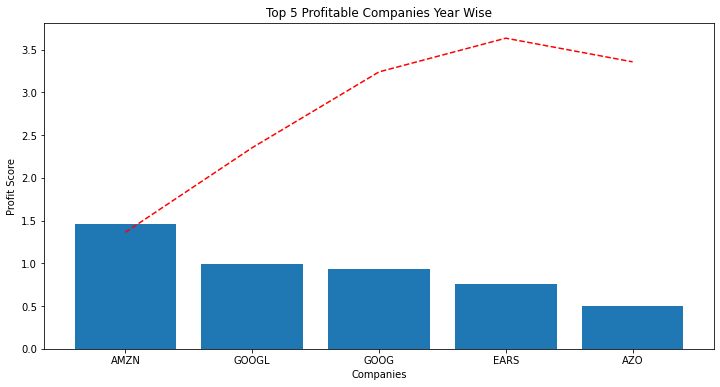

In [70]:
#Plotting the Top5 Profitable Companies
import matplotlib.pyplot as plt
import numpy as np

co = list(zip(*top5))[0]
profit = list(zip(*top5))[1]
x_pos = np.arange(len(co))

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, profit, 1)
trendline = intercept + (profit * x_pos)

plt.figure(figsize=(12,6))
plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, profit,align='center')
plt.xticks(x_pos, co) 
plt.ylabel('Profit Score')
plt.xlabel('Companies')
plt.title("Top 5 Profitable Companies Year Wise")
plt.show()

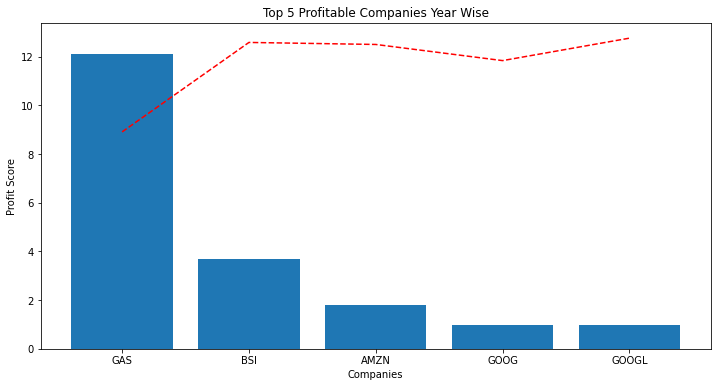

In [71]:
#Plotting the Top5 Profitable Companies
import matplotlib.pyplot as plt
import numpy as np

co = list(zip(*top_5))[0]
profit = list(zip(*top_5))[1]
x_pos = np.arange(len(co))

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, profit, 1)
trendline = intercept + (profit * x_pos)

plt.figure(figsize=(12,6))
plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, profit,align='center')
plt.xticks(x_pos, co) 
plt.ylabel('Profit Score')
plt.xlabel('Companies')
plt.title("Top 5 Profitable Companies Year Wise")
plt.show()